### 1. Counting all paragraphs

In [40]:
all_lines = len(data)
print(f"Общее количество строк в файле: {all_lines}")

Общее количество строк в файле: 56952


### 2. Counting unique paragraphs

In [41]:
# counting unique ids
unique_ids = set([item['uid'] for item in data])
print(f"Количество уникальных ид в файле: {len(unique_ids)}")

# counting unique paragraphs by set 
unqiue_paragraphs = set([item['text'] for item in data])
print(f"Количество уникальных параграфов в файле: {len(unqiue_paragraphs)}")

# counting unique paragraphs by hash
unqiue_paragraphs_hash = set([hash(item['text']) for item in data])
print(f"Количество уникальных параграфов в файле (по хешу): {len(unqiue_paragraphs_hash)}")

Количество уникальных ид в файле: 56952
Количество уникальных параграфов в файле: 56826
Количество уникальных параграфов в файле (по хешу): 56826


### 3. Calculating mean, max and min len of the paragraphs, counting empty paragraphs and paragraphs with len less than 20 chars

In [42]:
# mean len of paragraphs
all_lines = len(data)

mean_len = sum([len(item['text']) for item in data]) / all_lines
print(f"Средняя длинна параграфов в файле: {mean_len}")

# max lean of paragraphs
max_len = max([len(item['text']) for item in data])
print(f"Максимальная длинна параграфа в файле: {max_len}")

# min lean of paragraphs
min_len = min([len(item['text']) for item in data])
print(f"Минимальная длинна параграфа в файле: {min_len}")

# empty paragraphs
empty_paragraphs = sum([item for item in data if len(item['text']) <= 0])
print(f"Количество пустых параграфов в данных: {empty_paragraphs}")

# paragraphs with len less than 20 chars
short_paragraphs = len([item for item in data if len(item['text']) <= 20])
print(f"Количество параграфов короче, чем 20 символов: {short_paragraphs}")

Средняя длинна параграфов в файле: 448.51661047899984
Максимальная длинна параграфа в файле: 11010
Минимальная длинна параграфа в файле: 1
Количество пустых параграфов в данных: 0
Количество параграфов короче, чем 20 символов: 315


### 4. Counting paragraphs with broken chars and broken chars

In [43]:
# broken paragraphs
broken = len([t for t in data if '�' in t['text']])
print(f"Количество текстов с битыми символами: {broken}")

# broken chars
broken_chars = sum([len([c for c in t['text'] if c == '�']) for t in data])
print(f"Количество битых символов: {broken_chars}")

Количество текстов с битыми символами: 0
Количество битых символов: 0


### 5. Building a distribution of texts by length

Квантили по символам: {25: np.float64(172.0), 50: np.float64(343.0), 75: np.float64(600.0), 90: np.float64(924.0), 95: np.float64(1173.449999999997)}


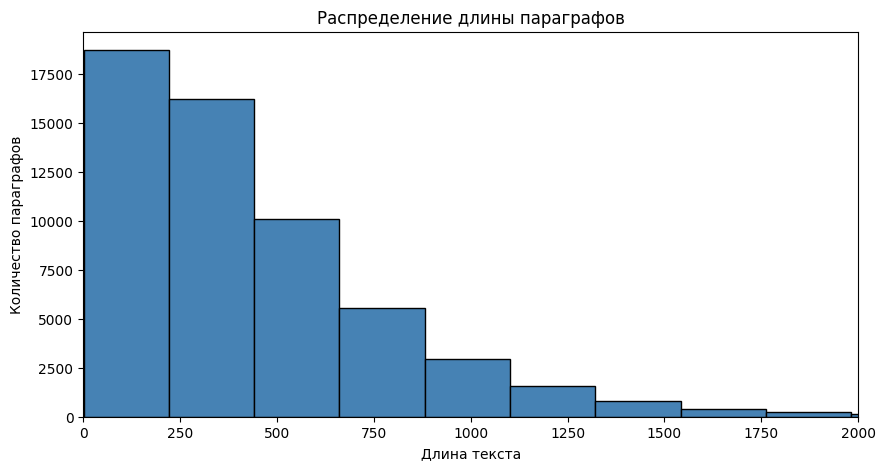

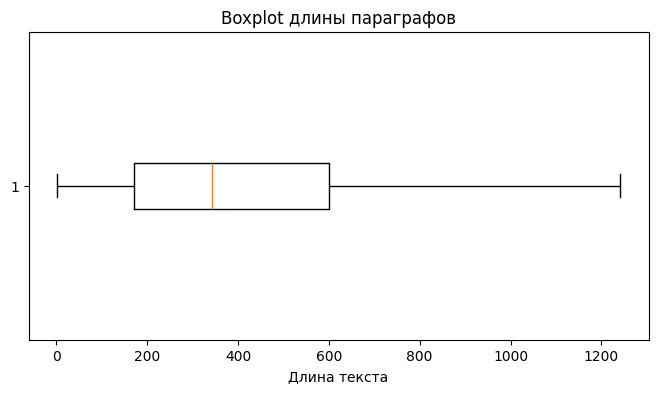

In [44]:
import matplotlib.pyplot as plt
import numpy as np

texts = [i['text'] for i in data]
lengths = [len(t['text']) for t in data]

quantiles_arr = [25, 50, 75, 90, 95]
quantiles = np.percentile(lengths, quantiles_arr)
print(f"Квантили по символам: {dict(zip(quantiles_arr, quantiles))}")

# histogram
plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=50, color='steelblue', edgecolor='black')
plt.title("Распределение длины параграфов")
plt.xlabel("Длина текста")
plt.ylabel("Количество параграфов")
plt.xlim(0, 2000)
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(lengths, vert=False, showfliers=False)
plt.title("Boxplot длины параграфов")
plt.xlabel("Длина текста")
plt.show()

___